# Project1: App Rating Prediction

In [1]:
# Importing library

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## 1. Load the data file using pandas

In [2]:
df = pd.read_csv('googleplaystore_dataset/googleplaystore.csv')

In [3]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


## 2. Checking for null Values in the data

In [6]:
df.isnull()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,False,False,False,False,False,False,False,False,False,False,False,False,False
10837,False,False,False,False,False,False,False,False,False,False,False,False,False
10838,False,False,True,False,False,False,False,False,False,False,False,False,False
10839,False,False,False,False,False,False,False,False,False,False,False,False,False


In [7]:
# Checking for null values count by each column
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

## Data Wrangling

## 3.	Drop records with nulls in any of the columns

In [8]:
df.dropna(inplace= True)

In [9]:
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [10]:
# Checking the revised Rows and columns
df.reset_index(drop= True, inplace = True)
df.shape

(9360, 13)

In [11]:
# checking the Data Types of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9360 entries, 0 to 9359
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9360 non-null   object 
 1   Category        9360 non-null   object 
 2   Rating          9360 non-null   float64
 3   Reviews         9360 non-null   object 
 4   Size            9360 non-null   object 
 5   Installs        9360 non-null   object 
 6   Type            9360 non-null   object 
 7   Price           9360 non-null   object 
 8   Content Rating  9360 non-null   object 
 9   Genres          9360 non-null   object 
 10  Last Updated    9360 non-null   object 
 11  Current Ver     9360 non-null   object 
 12  Android Ver     9360 non-null   object 
dtypes: float64(1), object(12)
memory usage: 950.8+ KB


In [12]:
df['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '5.5M', '17M', '39M', '31M',
       '4.2M', '23M', '6.0M', '6.1M', '4.6M', '9.2M', '5.2M', '11M',
       '24M', 'Varies with device', '9.4M', '15M', '10M', '1.2M', '26M',
       '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k', '3.6M', '5.7M',
       '8.6M', '2.4M', '27M', '2.7M', '2.5M', '7.0M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '22M', '6.4M', '3.2M', '8.2M', '4.9M', '9.5M', '5.0M',
       '5.9M', '13M', '73M', '6.8M', '3.5M', '4.0M', '2.3M', '2.1M',
       '42M', '9.1M', '55M', '23k', '7.3M', '6.5M', '1.5M', '7.5M', '51M',
       '41M', '48M', '8.5M', '46M', '8.3M', '4.3M', '4.7M', '3.3M', '40M',
       '7.8M', '8.8M', '6.6M', '5.1M', '61M', '66M', '79k', '8.4M',
       '3.7M', '118k', '44M', '695k', '1.6M', '6.2M', '53M', '1.4M',
      

## 4. Cleaning the columns

1.Size column 

In [13]:
# Remove 'M' from size values
df['Size'] = df['Size'].apply(lambda x: str(x).replace('M', '') if 'M' in str(x) else x)

# Replace 'Varies with device' with 'nan'
df['Size'] = df['Size'].apply(lambda x: str(x).replace('Varies with device', 'nan') if 'Varies with device' in str(x) else x)

# Convert 'k' values to millions format (e.g., 19k => 19 / 1000 = 0.019)
df['Size'] = df['Size'].apply(lambda x: float(str(x).replace('k', ''))/1000 if 'k' in str(x) else x)

# Convert all values to float
df['Size'] = df['Size'].apply(lambda x: float(x))

# Remove rows where 'Size' is NaN
df = df[pd.notnull(df['Size'])]

In [14]:
df['Size'].dtype

dtype('float64')

In [15]:
# Check the number of missing values
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [16]:
# Check unique values again to see if there are any unexpected entries left
df['Size'].unique()

array([1.90e+01, 1.40e+01, 8.70e+00, 2.50e+01, 2.80e+00, 5.60e+00,
       2.90e+01, 3.30e+01, 3.10e+00, 2.80e+01, 1.20e+01, 2.00e+01,
       2.10e+01, 3.70e+01, 5.50e+00, 1.70e+01, 3.90e+01, 3.10e+01,
       4.20e+00, 2.30e+01, 6.00e+00, 6.10e+00, 4.60e+00, 9.20e+00,
       5.20e+00, 1.10e+01, 2.40e+01, 9.40e+00, 1.50e+01, 1.00e+01,
       1.20e+00, 2.60e+01, 8.00e+00, 7.90e+00, 5.60e+01, 5.70e+01,
       3.50e+01, 5.40e+01, 2.01e-01, 3.60e+00, 5.70e+00, 8.60e+00,
       2.40e+00, 2.70e+01, 2.70e+00, 2.50e+00, 7.00e+00, 1.60e+01,
       3.40e+00, 8.90e+00, 3.90e+00, 2.90e+00, 3.80e+01, 3.20e+01,
       5.40e+00, 1.80e+01, 1.10e+00, 2.20e+00, 4.50e+00, 9.80e+00,
       5.20e+01, 9.00e+00, 6.70e+00, 3.00e+01, 2.60e+00, 7.10e+00,
       2.20e+01, 6.40e+00, 3.20e+00, 8.20e+00, 4.90e+00, 9.50e+00,
       5.00e+00, 5.90e+00, 1.30e+01, 7.30e+01, 6.80e+00, 3.50e+00,
       4.00e+00, 2.30e+00, 2.10e+00, 4.20e+01, 9.10e+00, 5.50e+01,
       2.30e-02, 7.30e+00, 6.50e+00, 1.50e+00, 7.50e+00, 5.10e

In [17]:
# Check the DataFrame shape
df.shape

(7723, 13)

2.Convert Reviews Column to Numeric

In [18]:
df['Reviews'].unique()

array(['159', '967', '87510', ..., '603', '1195', '398307'], dtype=object)

In [19]:
# Convert Reviews to numeric
df['Reviews'] = pd.to_numeric(df['Reviews'], errors='coerce')

In [20]:
df['Reviews'].dtype

dtype('int64')

3. Clean and Convert Installs Column

In [21]:
df['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000+', '500,000,000+', '100+', '500+', '10+', '1,000,000,000+',
       '5+', '50+', '1+'], dtype=object)

In [22]:
# Convert Installs column to string, remove '+' and ',', and convert to integer
df['Installs'] = df['Installs'].astype(str).str.replace('+', '', regex=False).str.replace(',', '', regex=False).astype(int)

In [23]:
df['Installs'].dtype

dtype('int32')

In [24]:
df.shape

(7723, 13)

4. Clean and Convert Price Column

In [25]:
df['Price'].unique()

array(['0', '$4.99', '$6.99', '$7.99', '$3.99', '$5.99', '$2.99', '$1.99',
       '$9.99', '$0.99', '$9.00', '$5.49', '$10.00', '$24.99', '$11.99',
       '$79.99', '$16.99', '$14.99', '$29.99', '$12.99', '$3.49',
       '$10.99', '$7.49', '$1.50', '$19.99', '$15.99', '$33.99', '$39.99',
       '$2.49', '$4.49', '$1.70', '$1.49', '$3.88', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$1.59',
       '$6.49', '$1.29', '$299.99', '$379.99', '$37.99', '$18.99',
       '$389.99', '$8.49', '$1.75', '$14.00', '$2.00', '$3.08', '$2.59',
       '$19.40', '$15.46', '$8.99', '$3.04', '$13.99', '$4.29', '$3.28',
       '$4.60', '$1.00', '$2.90', '$1.97', '$2.56', '$1.20'], dtype=object)

In [26]:
# Clean and convert Price column
df['Price'] = df['Price'].str.replace('$', '', regex=False).astype(float)

In [27]:
df['Price'].dtype

dtype('float64')

In [28]:
df.shape

(7723, 13)

## 5. Sanity Checks

1.	Average rating should be between 1 and 5 as only these values are allowed on the play store. Drop the rows that have a value outside this range.

In [29]:
df['Rating'].unique()

array([4.1, 3.9, 4.7, 4.5, 4.3, 4.4, 3.8, 4.2, 4.6, 4. , 4.8, 4.9, 3.6,
       3.7, 3.2, 3.3, 3.4, 3.5, 3.1, 5. , 2.6, 3. , 1.9, 2.5, 2.8, 2.7,
       1. , 2.9, 2.3, 2.2, 1.7, 2. , 1.8, 2.4, 1.6, 2.1, 1.4, 1.5, 1.2])

In [30]:
# drop invalid Ratings
df = df[(df['Rating'] >= 1) & (df['Rating'] <= 5)]

In [31]:
# Check for invalid Ratings
df[(df['Rating'] < 1) | (df['Rating'] > 5)].shape[0]

0

2.	Reviews should not be more than installs as only those who installed can review the app. If there are any such records, drop them.

In [32]:
df[df['Reviews']>df['Installs']].shape[0]

6

In [33]:
# drop invalid Reviews
df.drop(df[df['Reviews']>df['Installs']].index, inplace = True)

In [34]:
df = df[df['Reviews'] <= df['Installs']]

In [35]:
# Check for invalid Reviews
df[df['Reviews']>df['Installs']].shape[0]

0

3.	For free apps (type = “Free”), the price should not be >0. Drop any such rows.

In [36]:
# Remove rows where free apps have a non-zero price
df = df[~((df['Type'] == 'Free') & (df['Price'] > 0))]

In [37]:
# Check for invalid free apps
df[(df['Type']=='free')& (df['Price'] >0)].shape[0]

0

# 6. Univariate Analysis

## Box Plot for Price

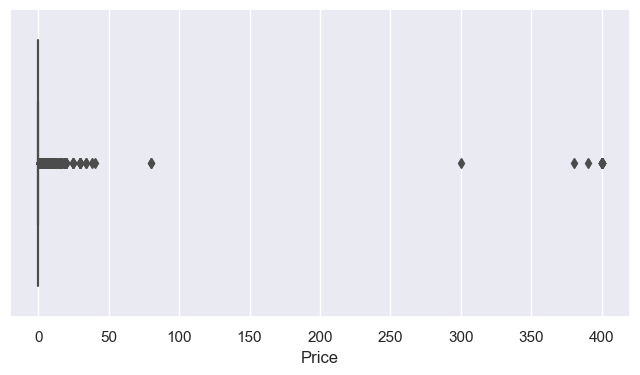

In [38]:
sns.set(rc={'figure.figsize':(8,4)})
sns.boxplot(x= 'Price',data= df);

There are some outliers in the Price column,i.e., there are some apps whose price is more than usual apps on the Googleplaystore

## Box Plot for Reviews

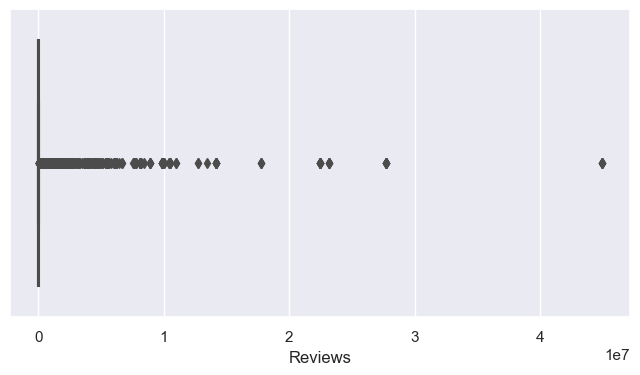

In [39]:
sns.boxplot(x ='Reviews', data =df);

Indeed there are some apps that have very high number of Reviews

## Histogram for Rating

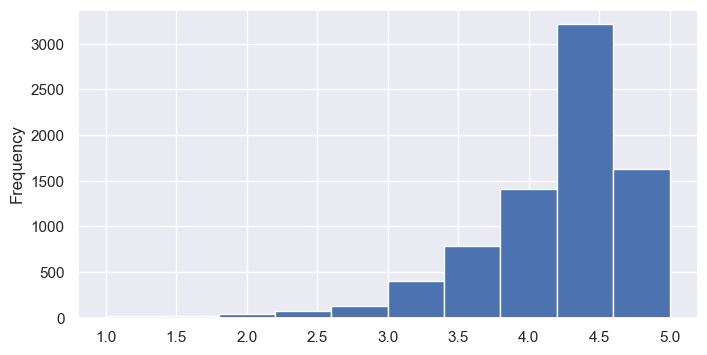

In [40]:
df['Rating'].plot(kind= 'hist'); 

(array([  17.,   18.,   39.,   72.,  132.,  408.,  781., 1406., 3212.,
        1632.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <BarContainer object of 10 artists>)

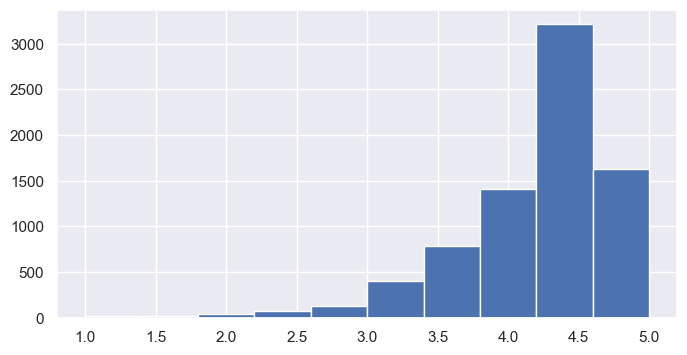

In [41]:
# Or use the following command
plt.hist(df['Rating'])

There is a Negative skewness(left- skewed) i.e. some apps seem to have higher Ratings than usual

## Histogram for Size

<Axes: ylabel='Frequency'>

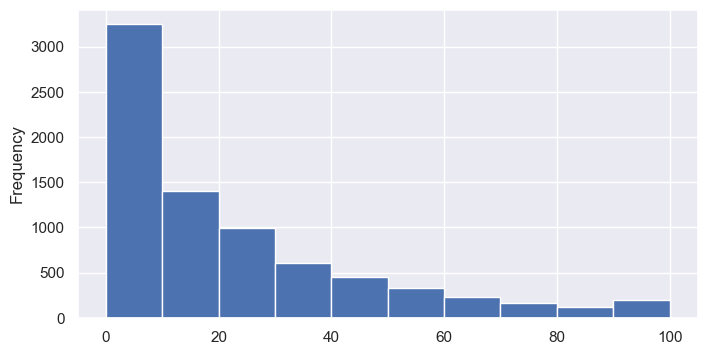

In [42]:
df['Size'].plot(kind= 'hist')

(array([3245., 1398.,  991.,  606.,  449.,  325.,  226.,  161.,  117.,
         199.]),
 array([8.500000e-03, 1.000765e+01, 2.000680e+01, 3.000595e+01,
        4.000510e+01, 5.000425e+01, 6.000340e+01, 7.000255e+01,
        8.000170e+01, 9.000085e+01, 1.000000e+02]),
 <BarContainer object of 10 artists>)

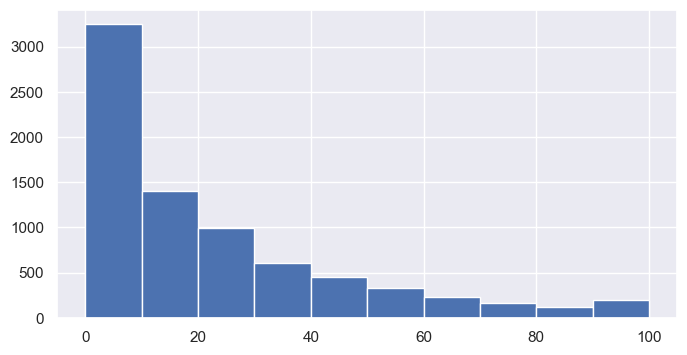

In [43]:
# Or use the following command
plt.hist(df['Size'])

There is a Positive skewness(Right Skewed)

# 7. Handling Outliers

## 1.	Handling Price Column Outliers

In [44]:
# Checking out the records with very high price and dropping these as most seem to be junk apps
df[df['Price']>200].index.shape[0]

15

In [45]:
#Dropping the Junk apps
df.drop(df[df['Price']>200].index, inplace= True)

In [46]:
df[df['Price']>200].index.shape[0]

0

## 2.	Handling Reviews Column Outliers

In [47]:
# Checking the apps that have very high no. of Reviews
df.loc[df['Reviews']>2000000].shape[0]

219

In [48]:
#Dropping the Star apps as these will skew the analysis
df.drop(df[df['Reviews']>2000000].index, inplace= True)

In [49]:
df.loc[df['Reviews']>2000000].shape[0]

0

## 3.	Handling Installs Column Outliers

In [50]:
# Checking the Apps having very high number of installs by finding out 
# the Percentiles of Installs and deciding a threshold as cutoff for outlier

# df.quantile([0.1,0.25,0.5,0.7,0.9,0.95,0.99], axis=0)

quantiles = df['Installs'].quantile([0.1, 0.25, 0.5, 0.7, 0.9, 0.95, 0.99])

# Display the quantiles
print(quantiles)

0.10        1000.0
0.25       10000.0
0.50      100000.0
0.70     1000000.0
0.90    10000000.0
0.95    10000000.0
0.99    50000000.0
Name: Installs, dtype: float64


In [51]:
df.loc[df['Installs']>10000000].shape[0]

176

In [52]:
#dropping the value more than the cutoff(threshold -95th percentile)
df.drop(df[df['Installs']>10000000].index, inplace= True)

In [53]:
df.loc[df['Installs']>10000000].shape[0]

0

# 8. Bivariate analysis

<Axes: xlabel='Rating', ylabel='Price'>

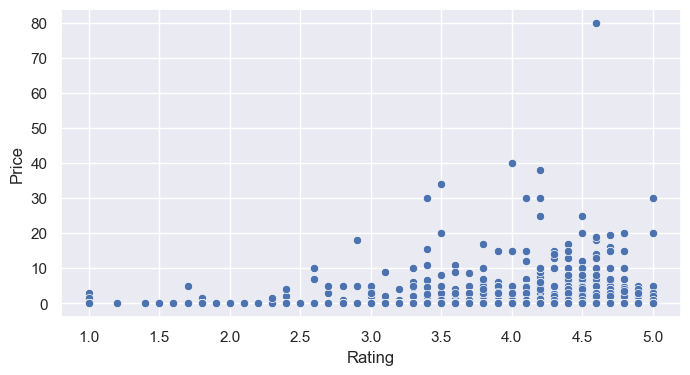

In [54]:
#1) Scatter plot/jointplot for Rating Vs. Price
sns.scatterplot(x = 'Rating', y = 'Price',data=df)

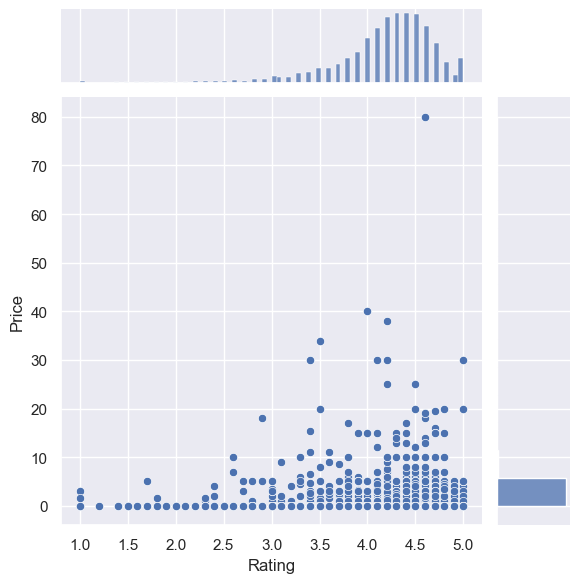

In [55]:
sns.jointplot(x= 'Rating',y= 'Price',data= df)

_Both the plots show a positive linear relationship; as the price of an app increases its rating also increases._
__This states the paid apps have the highest of Ratings__

<Axes: xlabel='Rating', ylabel='Size'>

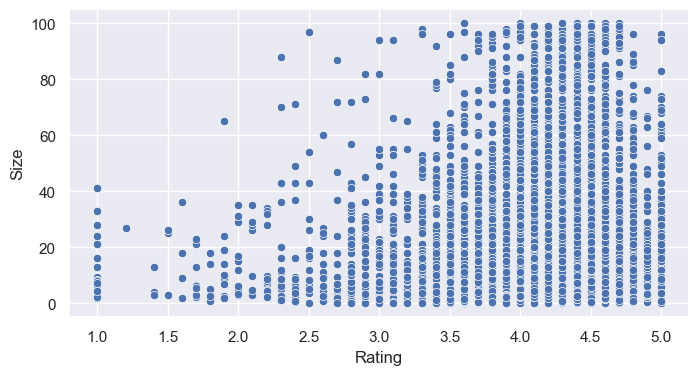

In [56]:
#2) Scatterplot/jointplot for Rating Vs. Size
sns.scatterplot(x= 'Rating',y= 'Size', data= df)

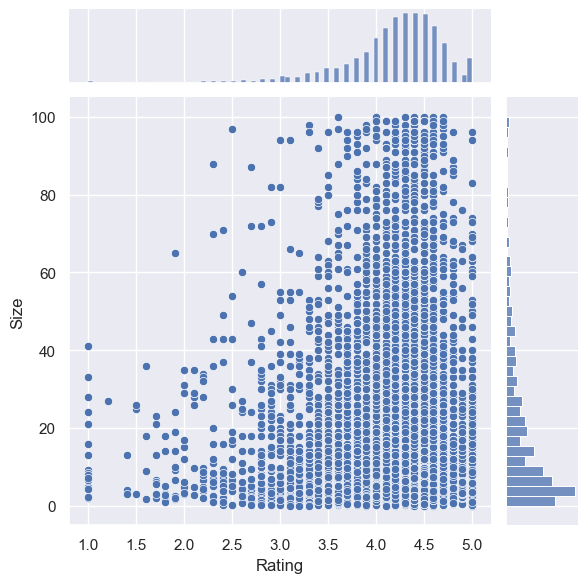

In [57]:
sns.jointplot(x= 'Rating', y= 'Size', data= df)

_The plots show a positive linear relationship; as the Size increases the Ratings increases._
__This states that the heavier apps are rated better__

<Axes: xlabel='Rating', ylabel='Reviews'>

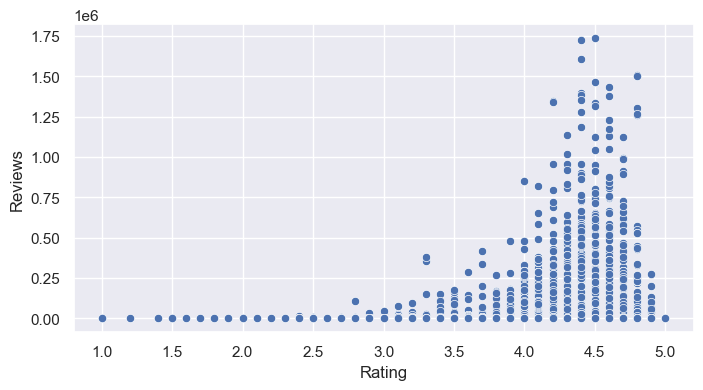

In [58]:
#3) Scatterplot for Ratings Vs. Reviews
sns.scatterplot(x= 'Rating',y= 'Reviews', data= df)

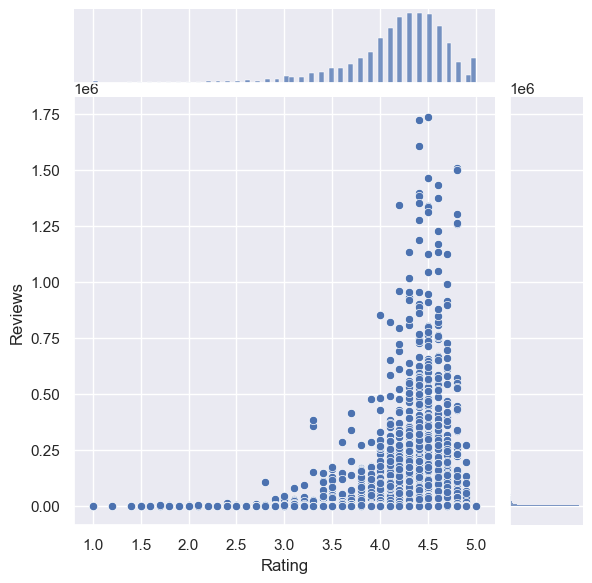

In [59]:
sns.jointplot(x= 'Rating', y= 'Reviews', data= df)

_The plot shows a positive linear relationship between Ratings and Reviews._ __More reviews mean better ratings indeed__

<Axes: xlabel='Rating', ylabel='Content Rating'>

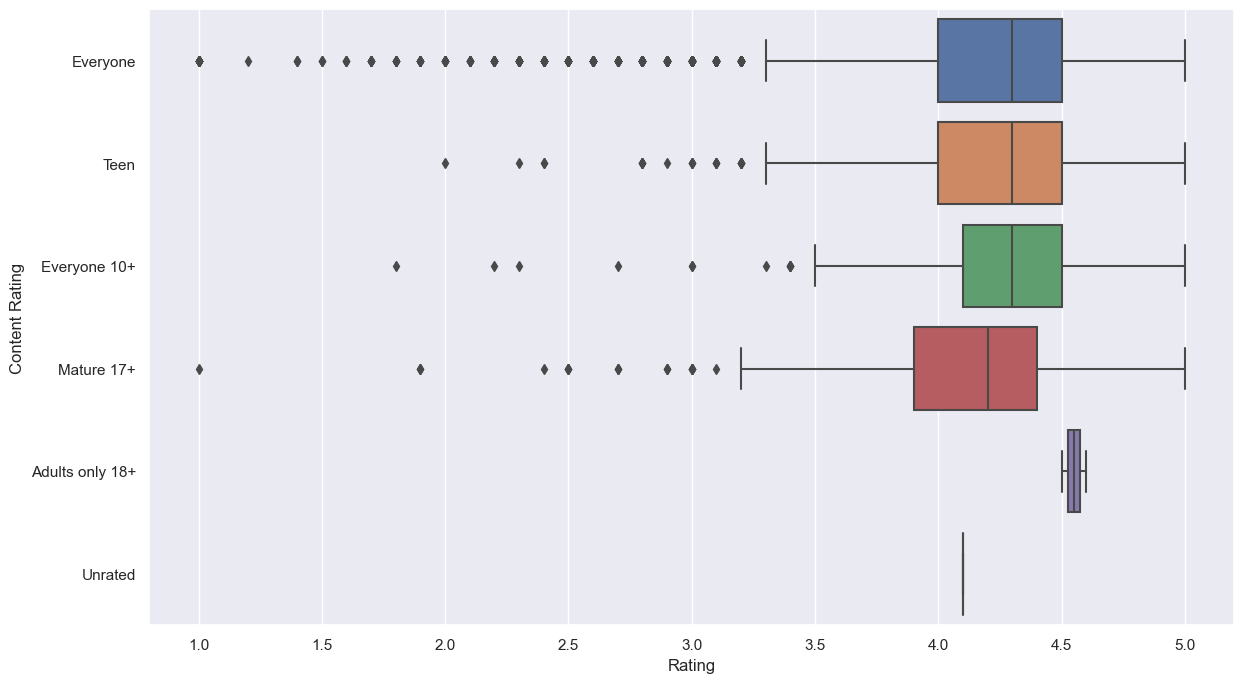

In [60]:
#4) Boxplot for Ratings Vs. Content Rating
sns.set(rc={'figure.figsize':(14,8)})
sns.boxplot(x= 'Rating', y= 'Content Rating', data = df)

_The above plot shows the apps for Everyone is worst rated as it contain the highest number of outliers followed by apps for Mature 17+ and Everyone 10+ along with Teen._ __The catergory Adults only 18+ is rated better and falls under most liked type__

<Axes: xlabel='Rating', ylabel='Category'>

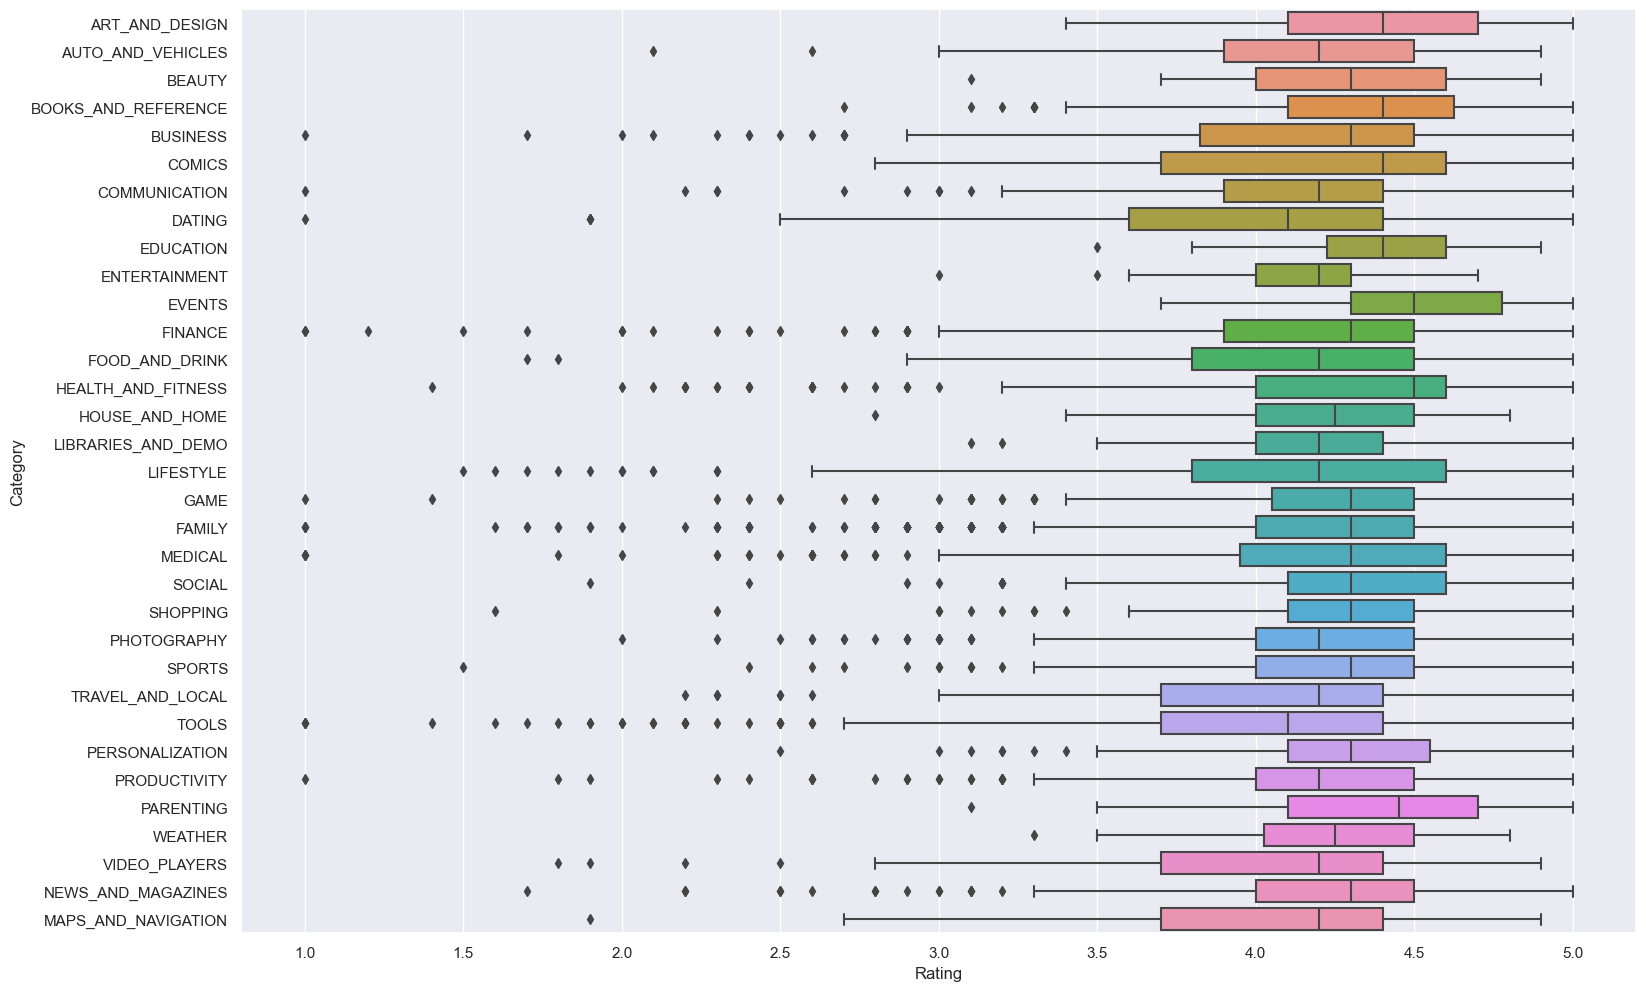

In [61]:
#5) Boxplot for Ratings Vs. Category
sns.set(rc={'figure.figsize':(18,12)})
sns.boxplot(x= 'Rating', y = 'Category', data= df)

_From the above plot the Category 'Events' has the best __Ratings__ out of all other app genres_

# 9. Data preprocessing

In [62]:
#creating a copy of the data(df) to make all edits
inp1= df.copy()

In [63]:
inp1.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6,50000,Free,0.0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up


### _Reviews and Installs column still have some relatively high values, before building the linear regression model we need to reduce the skew; columns needs log transformation_

In [64]:
inp1.skew(numeric_only=True)

Rating      -1.692510
Reviews      5.305328
Size         1.533259
Installs     1.922597
Price       15.724184
dtype: float64

In [65]:
#1) applying log transformation to Reviews and Installs
reviews_skew = np.log1p(inp1['Reviews'])
inp1['Reviews']= reviews_skew

In [66]:
reviews_skew.skew()

-0.06808430177422442

In [67]:
Installs_skew = np.log1p(inp1['Installs'])
inp1['Installs']

0          10000
1         500000
2        5000000
4         100000
5          50000
          ...   
9354        1000
9355         500
9356        5000
9357         100
9359    10000000
Name: Installs, Length: 7307, dtype: int32

In [68]:
Installs_skew.skew()

-0.3930918801065247

In [69]:
#2) Dropping the columns- App, Last Updated, Current Ver, Type, & Andriod Ver as these won't be useful for our model
inp1.drop(['App','Last Updated','Current Ver','Android Ver','Type'], axis= 1, inplace = True)

In [70]:
inp1.head()

,Category,Rating,Reviews,Size,Installs,Price,Content Rating,Genres
0,ART_AND_DESIGN,4.1,5.075174,19.0,10000,0.0,Everyone,Art & Design
1,ART_AND_DESIGN,3.9,6.875232,14.0,500000,0.0,Everyone,Art & Design;Pretend Play
2,ART_AND_DESIGN,4.7,11.379520,8.7,5000000,0.0,Everyone,Art & Design
4,ART_AND_DESIGN,4.3,6.875232,2.8,100000,0.0,Everyone,Art & Design;Creativity
5,ART_AND_DESIGN,4.4,5.123964,5.6,50000,0.0,Everyone,Art & Design


3) Dummy Encoding

_As Model does not understand any Catergorical variable_
_these need to be converted to numerical_

_Dummy Encoding is one way to convert these columns into numerical_

In [71]:
# create a copy of dataframe
inp2 = inp1

In [72]:
inp2.head()

,Category,Rating,Reviews,Size,Installs,Price,Content Rating,Genres
0,ART_AND_DESIGN,4.1,5.075174,19.0,10000,0.0,Everyone,Art & Design
1,ART_AND_DESIGN,3.9,6.875232,14.0,500000,0.0,Everyone,Art & Design;Pretend Play
2,ART_AND_DESIGN,4.7,11.379520,8.7,5000000,0.0,Everyone,Art & Design
4,ART_AND_DESIGN,4.3,6.875232,2.8,100000,0.0,Everyone,Art & Design;Creativity
5,ART_AND_DESIGN,4.4,5.123964,5.6,50000,0.0,Everyone,Art & Design


In [73]:
#get unique values in column Category
inp2['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

In [74]:
inp2.Category = pd.Categorical(inp2.Category)

x = inp2[['Category']]
del inp2['Category']

dummies = pd.get_dummies(x, prefix = 'Category')
inp2 = pd.concat([inp2,dummies], axis=1)
inp2.head()

,Rating,Reviews,Size,Installs,Price,Content Rating,Genres,Category_ART_AND_DESIGN,Category_AUTO_AND_VEHICLES,Category_BEAUTY,...,Category_PERSONALIZATION,Category_PHOTOGRAPHY,Category_PRODUCTIVITY,Category_SHOPPING,Category_SOCIAL,Category_SPORTS,Category_TOOLS,Category_TRAVEL_AND_LOCAL,Category_VIDEO_PLAYERS,Category_WEATHER
0,4.1,5.075174,19.0,10000,0.0,Everyone,Art & Design,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3.9,6.875232,14.0,500000,0.0,Everyone,Art & Design;Pretend Play,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4.7,11.379520,8.7,5000000,0.0,Everyone,Art & Design,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4.3,6.875232,2.8,100000,0.0,Everyone,Art & Design;Creativity,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5,4.4,5.123964,5.6,50000,0.0,Everyone,Art & Design,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [75]:
#get unique values in Column Genres
inp2["Genres"].unique()

array(['Art & Design', 'Art & Design;Pretend Play',
       'Art & Design;Creativity', 'Auto & Vehicles', 'Beauty',
       'Books & Reference', 'Business', 'Comics', 'Comics;Creativity',
       'Communication', 'Dating', 'Education', 'Education;Creativity',
       'Education;Education', 'Education;Action & Adventure',
       'Education;Pretend Play', 'Education;Brain Games', 'Entertainment',
       'Entertainment;Brain Games', 'Entertainment;Music & Video',
       'Events', 'Finance', 'Food & Drink', 'Health & Fitness',
       'House & Home', 'Libraries & Demo', 'Lifestyle',
       'Lifestyle;Pretend Play', 'Card', 'Casual', 'Puzzle', 'Action',
       'Arcade', 'Word', 'Racing', 'Casual;Creativity', 'Sports', 'Board',
       'Simulation', 'Role Playing', 'Strategy', 'Simulation;Education',
       'Action;Action & Adventure', 'Trivia', 'Casual;Brain Games',
       'Simulation;Action & Adventure', 'Educational;Creativity',
       'Puzzle;Brain Games', 'Educational;Education', 'Card;Brain 

_There are too many categories under Genres.
Hence, we will try to reduce some categories which have very few samples under them and put them under one new common category i.e. "Other"_

In [76]:
#Create an empty list
lists = []
#Get the total genres count and gernes count of perticular gerner count less than 20 append those into the list
for i in inp2.Genres.value_counts().index:
    if inp2.Genres.value_counts()[i]<20:
        lists.append(i)
#changing the gerners which are in the list to other
inp2.Genres = ['Other' if i in lists else i for i in inp2.Genres]

In [77]:
inp2["Genres"].unique()

array(['Art & Design', 'Other', 'Auto & Vehicles', 'Beauty',
       'Books & Reference', 'Business', 'Comics', 'Communication',
       'Dating', 'Education', 'Education;Education',
       'Education;Pretend Play', 'Entertainment', 'Events', 'Finance',
       'Food & Drink', 'Health & Fitness', 'House & Home',
       'Libraries & Demo', 'Lifestyle', 'Card', 'Casual', 'Puzzle',
       'Action', 'Arcade', 'Word', 'Racing', 'Sports', 'Board',
       'Simulation', 'Role Playing', 'Strategy', 'Trivia',
       'Educational;Education', 'Casual;Pretend Play', 'Medical',
       'Social', 'Shopping', 'Photography', 'Travel & Local', 'Tools',
       'Personalization', 'Productivity', 'Parenting', 'Weather',
       'Video Players & Editors', 'News & Magazines', 'Maps & Navigation',
       'Adventure', 'Educational', 'Casino'], dtype=object)

In [78]:
#Storing the genres column into x varible and delete the genres column from dataframe inp2
#And concat the encoded cols to the dataframe inp2
inp2.Genres = pd.Categorical(inp2['Genres'])
x = inp2[["Genres"]]
del inp2['Genres']
dummies = pd.get_dummies(x, prefix = 'Genres')
inp2 = pd.concat([inp2,dummies], axis=1)

In [79]:
inp2.head()

,Rating,Reviews,Size,Installs,Price,Content Rating,Category_ART_AND_DESIGN,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,...,Genres_Simulation,Genres_Social,Genres_Sports,Genres_Strategy,Genres_Tools,Genres_Travel & Local,Genres_Trivia,Genres_Video Players & Editors,Genres_Weather,Genres_Word
0,4.1,5.075174,19.0,10000,0.0,Everyone,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3.9,6.875232,14.0,500000,0.0,Everyone,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4.7,11.379520,8.7,5000000,0.0,Everyone,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4.3,6.875232,2.8,100000,0.0,Everyone,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,4.4,5.123964,5.6,50000,0.0,Everyone,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [80]:
#getting the unique values in Column "Content Rating"
inp2["Content Rating"].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

In [81]:
#Applying one hot encoding 
#Storing the Content Rating column into x varible and delete the Content Rating column from dataframe inp2
#And concat the encoded cols to the dataframe inp2
inp2['Content Rating'] = pd.Categorical(inp2['Content Rating'])

x = inp2[['Content Rating']]
del inp2['Content Rating']

dummies = pd.get_dummies(x, prefix = 'Content Rating')
inp2 = pd.concat([inp2,dummies], axis=1)
inp2.head()

,Rating,Reviews,Size,Installs,Price,Category_ART_AND_DESIGN,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,...,Genres_Trivia,Genres_Video Players & Editors,Genres_Weather,Genres_Word,Content Rating_Adults only 18+,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Content Rating_Unrated
0,4.1,5.075174,19.0,10000,0.0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,3.9,6.875232,14.0,500000,0.0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,4.7,11.379520,8.7,5000000,0.0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,4.3,6.875232,2.8,100000,0.0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
5,4.4,5.123964,5.6,50000,0.0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


# 10. Train test split and apply 70-30 split. Name the new dataframes df_train and df_test
# &
# 11. Separate the dataframes into X_train, y_train, X_test, and y_test

In [82]:
#importing the neccessary libraries from sklearn to split the data and and for model building
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse
from sklearn import metrics

In [83]:
#Creating the variable X and Y which contains the X features as independent features and Y is the target feature 
df2 = inp2
X = df2.drop('Rating',axis=1)
y = df2['Rating']

#Dividing the X and y into test and train data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=5)

# 12. Model Building

In [86]:
#Create a linear reggression obj by calling the linear reggressor algorithm
lin_reggressor = LinearRegression()
lin_reggressor.fit(X_train,y_train)

LinearRegression()

In [87]:
R2_Score_train_data = round(lin_reggressor.score(X_train,y_train),3)
print("The R2 value of the Training Set is : {}".format(R2_Score_train_data))

The R2 value of the Training Set is : 0.068


# 13. Make predictions on test set and report R2

In [88]:
# Make predictions on the test set
y_pred = lin_reggressor.predict(X_test)

# Calculate R2 score on the test set (computes the 
# 𝑅2 score based on the predicted values (y_pred) and the actual values (y_test))
R2_Score_test_data = metrics.r2_score(y_test, y_pred)

# Print the R2 score of the test set
print("The R2 value of the Test Set is: {:.3f}".format(R2_Score_test_data))


The R2 value of the Test Set is: 0.058


In [89]:
# Calculate R2 score on test set (computes the 
# 𝑅2 score using the same data (test set X_test, y_test))
R2_Score_test_data = round(lin_reggressor.score(X_test, y_test), 3)

# Print the R2 score of the test set
print("The R2 value of the Test Set is : {}".format(R2_Score_test_data))

The R2 value of the Test Set is : 0.058
